<center><h1>Análisis e interpretación de datos</header1></center>
<left><h2>Actividad 3. Análisis libre de conjunto de datos</h2></left>

Presentado por:<br>
Balbas Pineda, Zoremi Karol<br>
Deulofeu Torres, Andrés Felipe<br>
Polo, Eduardo Esteban<br>
Zapata Quiñones, Eliana Irene<br>

Fecha: 27/06/2024

# Importación de librerias necesarias

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

## Cargar el Dataset

In [7]:
# Cargar los datos
url = 'https://github.com/adeulofeu/Datafolio/raw/main/Machine%20learning/Clustering/Airbnb_listing_reviews/listings_airbnb_Barcelona.xlsx'
data = pd.read_excel(url)

## Exploración del Dataset

In [8]:
# Exploración inicial del conjunto de datos
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18519 entries, 0 to 18518
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            18519 non-null  int64         
 1   host_id                                       18519 non-null  int64         
 2   host_url                                      18519 non-null  object        
 3   host_name                                     18517 non-null  object        
 4   host_since                                    18517 non-null  datetime64[ns]
 5   host_location                                 14209 non-null  object        
 6   host_about                                    11721 non-null  object        
 7   host_response_time                            15504 non-null  object        
 8   host_response_rate                            15504 non-null  obje

In [9]:
# Seleccionar columnas de interés para el análisis
review_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

# Imputar valores nulos con la media de cada columna
for column in review_columns:
    data[column].fillna(data[column].mean(), inplace=True)

C:\Users\deuand01\AppData\Local\Temp\ipykernel_6560\889907158.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [10]:
data[review_columns]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4.730000,4.840000,4.84000,4.910000,4.940000,4.710000,4.740000,0.220000
1,4.480000,4.730000,4.23000,4.820000,4.730000,4.820000,4.500000,0.170000
2,4.330000,4.440000,4.62000,4.740000,4.670000,4.770000,4.280000,0.300000
3,4.740000,4.860000,4.86000,4.910000,4.910000,4.450000,4.710000,0.450000
4,4.170000,4.280000,4.24000,4.110000,4.410000,4.650000,4.110000,0.380000
...,...,...,...,...,...,...,...,...
18514,4.594146,4.645266,4.61053,4.722092,4.723707,4.750413,4.469025,1.394233
18515,4.594146,4.645266,4.61053,4.722092,4.723707,4.750413,4.469025,1.394233
18516,4.594146,4.645266,4.61053,4.722092,4.723707,4.750413,4.469025,1.394233
18517,4.594146,4.645266,4.61053,4.722092,4.723707,4.750413,4.469025,1.394233


## Preprocesamiento de los datos

In [11]:
# Normalizar las columnas seleccionadas
scaler = MinMaxScaler()
data[review_columns] = scaler.fit_transform(data[review_columns])

## Generación de modelo de clustering

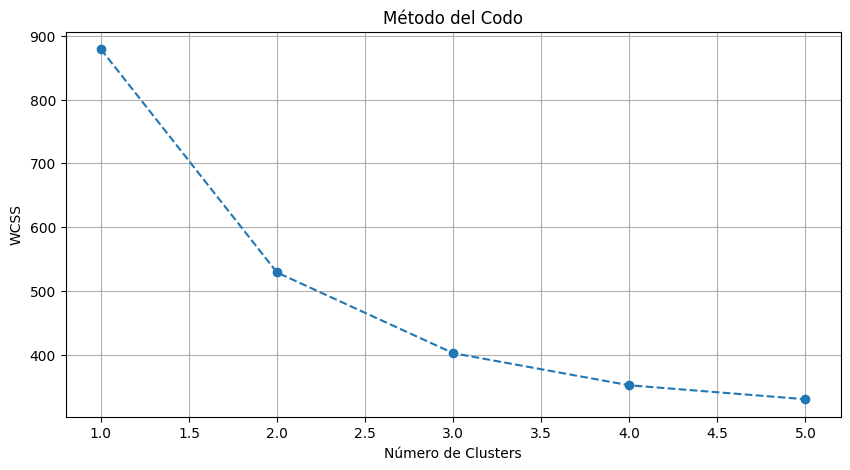

In [12]:
# Determinar el número óptimo de clusters usando el método del codo
wcss = []  # Within-cluster sum of squares
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[review_columns])
    wcss.append(kmeans.inertia_)

# Plot del método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
# Aplicar K-means con 3 clusters (o el número óptimo determinado)
k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[review_columns])

# Resumen de los clusters
cluster_summary = data.groupby('cluster')[review_columns].mean()
print(cluster_summary)

         review_scores_rating  review_scores_accuracy  \
cluster                                                 
0                    0.927080                0.950049   
1                    0.351836                0.506070   
2                    0.777887                0.842396   

         review_scores_cleanliness  review_scores_checkin  \
cluster                                                     
0                         0.942326               0.961486   
1                         0.543680               0.601586   
2                         0.835753               0.873873   

         review_scores_communication  review_scores_location  \
cluster                                                        
0                           0.962695                0.960770   
1                           0.557055                0.717203   
2                           0.873245                0.907733   

         review_scores_value  reviews_per_month  
cluster                              

## Generación de modelo de regresión

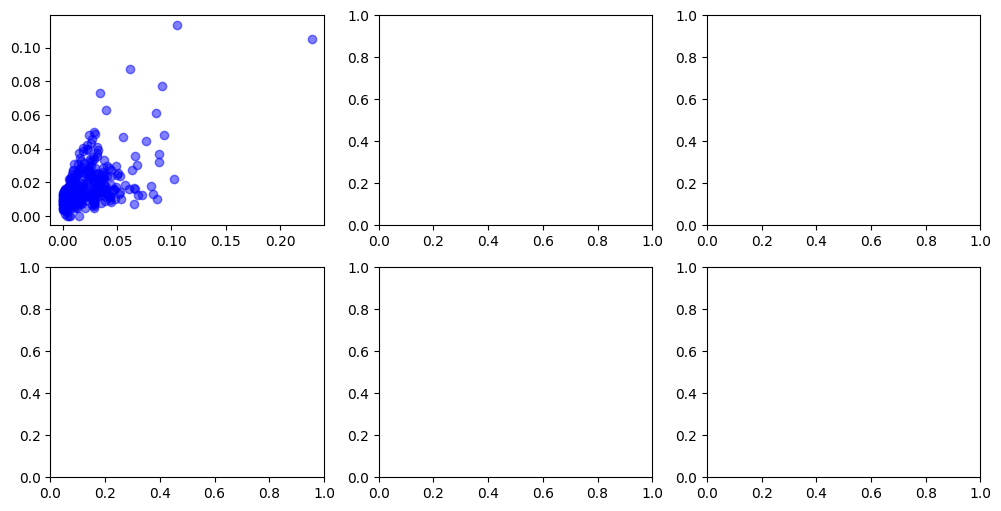

In [17]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=[12,6])
ax[0,0].scatter(y_test, y_pred_linear, color='blue', alpha=0.5)

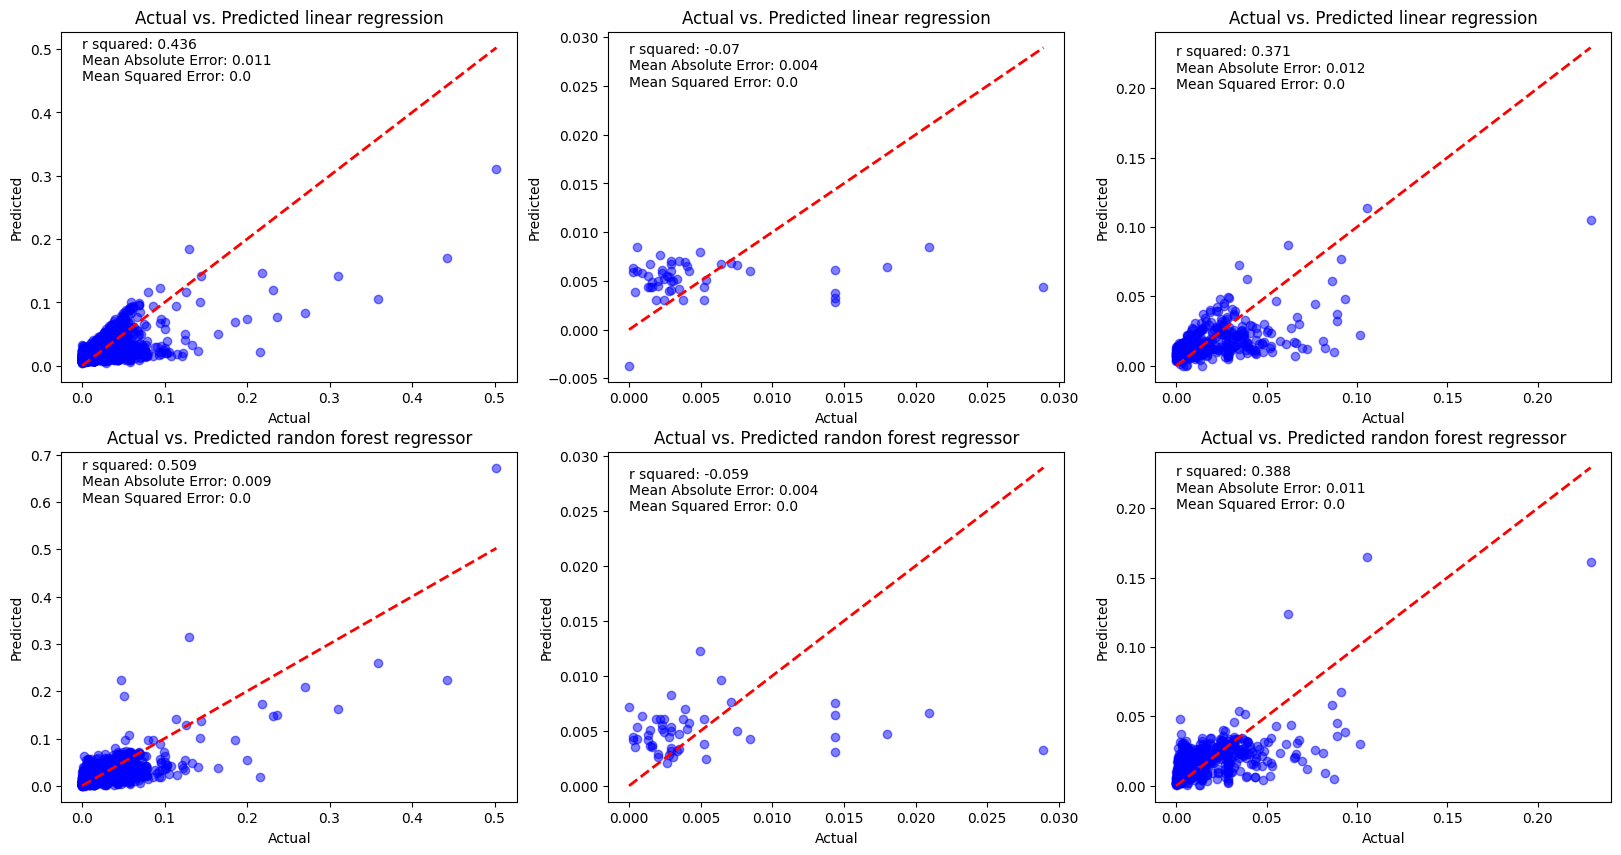

In [30]:
# Seleccionar características y objetivo
features = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'number_of_reviews'
]
target = 'reviews_per_month'

linear_models = []
linear_results = []
forest_models = []
forest_results = []

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=[20,10])

for i in range(k_clusters):
    data_cluster = data[data['cluster'] == i]

    # Dividir el conjunto de datos en entrenamiento y prueba
    X = data_cluster[features]
    y = data_cluster[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo de regresión lineal
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_models.append(linear_model)

    # Entrenar el modelo de Random Forest
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    forest_models.append(rf_model)

    # Predicciones y evaluación del modelo de regresión lineal
    y_pred_linear = linear_model.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    linear_results.append([mse_linear, mae_linear, r2_linear])

    # Predicciones y evaluación del modelo de Random Forest
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    forest_results.append([mse_rf, mae_rf, r2_rf])

    ax[0,i].scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
    ax[0,i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
    ax[0,i].set_xlabel('Actual')
    ax[0,i].set_ylabel('Predicted')
    ax[0,i].set_title('Actual vs. Predicted linear regression')
    if i == 0:
        ax[0,i].text(0,0.45,f'r squared: {round(r2_linear,3)} \nMean Absolute Error: {round(mae_linear,3)} \nMean Squared Error: {round(mse_linear,3)}')
    elif i == 1:
        ax[0,i].text(0,0.025,f'r squared: {round(r2_linear,3)} \nMean Absolute Error: {round(mae_linear,3)} \nMean Squared Error: {round(mse_linear,3)}')
    else:
        ax[0,i].text(0,0.2,f'r squared: {round(r2_linear,3)} \nMean Absolute Error: {round(mae_linear,3)} \nMean Squared Error: {round(mse_linear,3)}')

    ax[1,i].scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
    ax[1,i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
    ax[1,i].set_xlabel('Actual')
    ax[1,i].set_ylabel('Predicted')
    ax[1,i].set_title('Actual vs. Predicted randon forest regressor')
    if i == 0:
        ax[1,i].text(0,0.6,f'r squared: {round(r2_rf,3)} \nMean Absolute Error: {round(mae_rf,3)} \nMean Squared Error: {round(mse_rf,3)}')
    elif i == 1:
        ax[1,i].text(0,0.025,f'r squared: {round(r2_rf,3)} \nMean Absolute Error: {round(mae_rf,3)} \nMean Squared Error: {round(mse_rf,3)}')
    else:
        ax[1,i].text(0,0.2,f'r squared: {round(r2_rf,3)} \nMean Absolute Error: {round(mae_rf,3)} \nMean Squared Error: {round(mse_rf,3)}')


In [ ]:
print("Resultados de Regresión Lineal por Cluster:")
for idx, result in enumerate(linear_results):
    print(f"Cluster {idx}: MSE={result[0]}, MAE={result[1]}, R2={result[2]}")

print("\nResultados de Random Forest por Cluster:")
for idx, result in enumerate(forest_results):
    print(f"Cluster {idx}: MSE={result[0]}, MAE={result[1]}, R2={result[2]}")

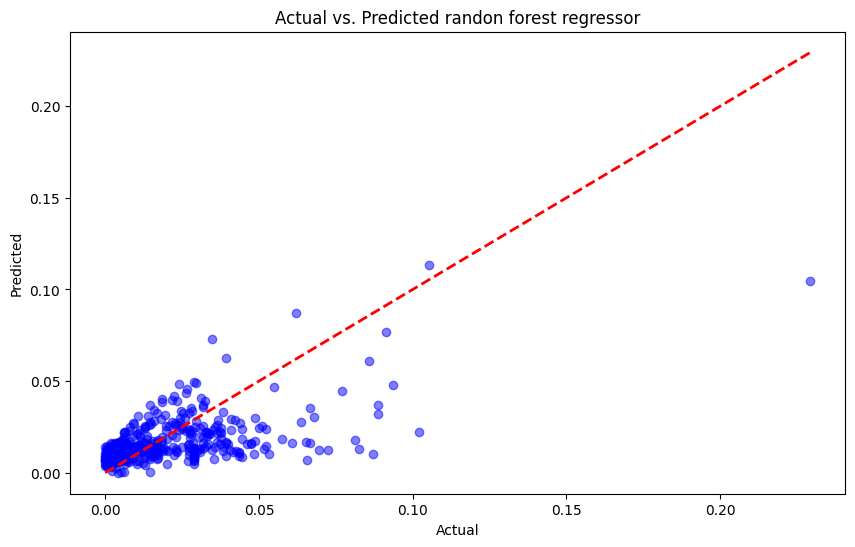

In [15]:
# Visualización de predicciones

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted randon forest regressor')
plt.show()
plt.text(-1,3.2,f'r squared: {round(r2_rf,3)} \nMean Absolute Error: {round(mae_rf,3)} \nMean Squared Error: {round(mse_rf,3)} \nRoot Mean Squared Error {round(rmse_rf,3)}')
